In [1]:
from google.colab import drive
drive.mount('drive')

!sudo apt update
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
!pip install pytesseract

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86

In [0]:
# def add_lines_to_image(gray):
#   ## (2) threshold
#   th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

#   ## (3) minAreaRect on the nozeros
#   pts = cv2.findNonZero(threshed)
#   ret = cv2.minAreaRect(pts)

#   (cx,cy), (w,h), ang = ret
#   if w>h:
#       w,h = h,w
#       ang += 90

#   ## (4) Find rotated matrix, do rotation
#   M = cv2.getRotationMatrix2D((cx,cy), ang, 1.0)
#   rotated = cv2.warpAffine(threshed, M, (img.shape[1], img.shape[0]))

#   ## (5) find and draw the upper and lower boundary of each lines
#   hist = cv2.reduce(rotated,1, cv2.REDUCE_AVG).reshape(-1)

#   th = 2
#   H,W = img.shape[:2]
#   uppers = [y for y in range(H-1) if hist[y]<=th and hist[y+1]>th]
#   lowers = [y for y in range(H-1) if hist[y]>th and hist[y+1]<=th]

#   rotated = cv2.cvtColor(rotated, cv2.COLOR_GRAY2BGR)
#   for y in uppers:
#       cv2.line(rotated, (0,y), (W, y), (255,0,0), 1)

#   for y in lowers:
#       cv2.line(rotated, (0,y), (W, y), (0,255,0), 1)
#   return rotated,uppers,lowers

# path = 'drive/My Drive/OCR/LT/LT_BILL_36000274018_201906 - Mahesh Banka.png'
# img = cv2.imread(first)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# image,uppers,lowers = add_lines_to_image(gray)

# cv2_imshow(cv2.resize(image,(int(image.shape[1]/2),int(image.shape[0]/2))))

# def get_segments(image,uppers,lowers):
#   segments = []
#   for i,j in zip(uppers,lowers):
#     if 'Consumer' in pytesseract.image_to_string(image[i:j]):
#       segments.append(image[i:j])
#   return segments

# horizontal_segments = get_segments(image,uppers,lowers)
# print( 'Customer Id  is found in')
# for img in horizontal_segments:
#   cv2_imshow(cv2.resize(img,(int(img.shape[1]/2),int(img.shape[0]/2))))
#   print('\n')

  
# # vertical_segments = []
# # for i in horizontal_segments:
# #   h = int(gray.shape[0])
# #   w = int(gray.shape[1])
# #   center = (w/2, h/2)
# #   angle90 = 90
# #   scale = 1.0
# #   # Perform the counter clockwise rotation holding at the center
# #   # 90 degrees
# #   M = cv2.getRotationMatrix2D(center, angle90, scale)
# #   rotated90 = cv2.warpAffine(i, M, (h, w))
# #   img,uppers,lowers = add_lines_to_image(rotated90)
# #   vertical_segments.append(get_segments(img,uppers,lowers))

# # idx = 0
# # cropped_dir_path = ''
# # imp = []
# # for c in contours:
# #     # Returns the location and width,height for every contour
# #     x, y, w, h = cv2.boundingRect(c)
# #     if h<70:
# #       idx += 1
# #       new_img = img[y:y+h, x:x+w]
# #       if 'Customer' in pytesseract.image_to_string(new_img):
# #         imp.append(new_img)

In [0]:
import os 
from PIL import Image
import pytesseract
import cv2
import numpy as np 
from google.colab.patches import cv2_imshow


In [0]:
# Resize the image maintaining the aspect rato 
def resize_image(url,to_gray= False):
  image = cv2.imread(url)
  if to_gray:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  new_height = 700
  new_width  = new_height * image.shape[1] / image.shape[0]
  return cv2.resize(image, (int(new_width), new_height)) 

# Get the coordinates from the bounding box 
def get_coordinates(url):
  img = resize_image(url,to_gray=False)
  lower_red = np.array([255,0,255])  
  upper_red = np.array([255,0,255])

  mask = cv2.inRange(img, lower_red, upper_red)
  coord = cv2.findNonZero(mask)
  try:
    y_min,x_min,y_max,x_max = np.array([coord[0],coord[-1]]).ravel()
    return (x_min,x_max,y_min,y_max )
  except:
    return (None,None,None,None)
  
# Make the image size constant by padding 0's to the image 
def pad_zeros(image):
  result = np.zeros((700,500))
  image = image[:700,:500]
  result[:image.shape[0],:image.shape[1]] = image
  return result[:,:,None]

In [0]:
import pandas as pd
path = 'drive/My Drive/OCR/data/'
imgs = os.listdir(path)

# Create a dataframe with orignal and image with bounding box 
t_df = pd.DataFrame({'image_name':[i for i in imgs if 'mask_' not in i ]})
t_df['image_name'] = t_df['image_name'].str.strip()
t_df['url'] = path+t_df['image_name']
cor_names = ['x_min','x_max','y_min','y_max']

# Dataframe with images containing bounding boxes 
masked_df = pd.DataFrame({'image_name': [i for i in imgs if 'mask_' in i ]})
masked_df['url'] = path+masked_df['image_name']
# Get the coordnates and store them in respective fields 
masked_df[cor_names] = masked_df['url'].apply(get_coordinates).apply(pd.Series)

# Remove the word mask so we can merge the co ordinates from the image 
masked_df['key'] = masked_df['image_name'].str.replace('mask_','').str.strip()

#Merge the images so the original image matches the coordinates of the required field 
train = t_df.merge(masked_df[['key']+cor_names],left_on=['image_name'],right_on=['key'],how='left').drop('key',1)
images = train['url'].apply(resize_image,to_gray=True).apply(pad_zeros).tolist()
y = train[cor_names].values

In [0]:
# Split training and testing data 
tr_idx,val_idx = train[~train.isnull().any(1)].index,train[train.isnull().any(1)].index

In [393]:
# Convnet model to predict the image coordinates 
from keras.engine.topology import Input
from keras.layers import BatchNormalization, Concatenate, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Model

def build_model(with_dropout=False):
    kwargs     = {'activation':'relu', 'padding':'same'}
    conv_drop  = 0.2
    dense_drop = 0.5
    inp        = Input((700,500,1))

    x = inp

    x = Conv2D(64, (9, 9), **kwargs)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = BatchNormalization()(x)
    if with_dropout: x = Dropout(conv_drop, noise_shape=(None, 1, 1, int(x.shape[-1])))(x)

    x = Conv2D(64, (2, 2), **kwargs, strides=2)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = BatchNormalization()(x)
    if with_dropout: x = Dropout(conv_drop, noise_shape=(None, 1, 1, int(x.shape[-1])))(x)

    x = Conv2D(64, (2, 2), **kwargs, strides=2)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = BatchNormalization()(x)
    if with_dropout: x = Dropout(conv_drop, noise_shape=(None, 1, 1, int(x.shape[-1])))(x)

    x = Conv2D(64, (2, 2), **kwargs, strides=2)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = BatchNormalization()(x)
    if with_dropout: x = Dropout(conv_drop, noise_shape=(None, 1, 1, int(x.shape[-1])))(x)

    x = Conv2D(64, (2, 2), **kwargs, strides=2)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = BatchNormalization()(x)
    if with_dropout: x = Dropout(conv_drop, noise_shape=(None, 1, 1, int(x.shape[-1])))(x)

    x = Conv2D(64, (2, 2), **kwargs, strides=2)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = BatchNormalization()(x)
    if with_dropout: x = Dropout(conv_drop, noise_shape=(None, 1, 1, int(x.shape[-1])))(x)

    h = MaxPooling2D(pool_size=(1, int(x.shape[2])))(x)
    h = Flatten()(h)
    if with_dropout: h = Dropout(dense_drop)(h)
    h = Dense(16, activation='relu')(h)

    v = MaxPooling2D(pool_size=(int(x.shape[1]), 1))(x)
    v = Flatten()(v)
    if with_dropout: v = Dropout(dense_drop)(v)
    v = Dense(16, activation='relu')(v)

    x = Concatenate()([h,v])
    if with_dropout: x = Dropout(0.5)(x)
    x = Dense(4, activation='linear')(x)
    return Model(inp,x)

model = build_model(with_dropout=True)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 700, 500, 1)  0                                            
__________________________________________________________________________________________________
conv2d_52 (Conv2D)              (None, 700, 500, 64) 5248        input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_53 (Conv2D)              (None, 700, 500, 64) 36928       conv2d_52[0][0]                  
__________________________________________________________________________________________________
batch_normalization_19 (BatchNo (None, 700, 500, 64) 256         conv2d_53[0][0]                  
____________________________________________________________________________________________

In [0]:
model.compile('adam', loss='mean_squared_error')
#Fit the model 
model.fit(np.array(images)[tr_idx],y[tr_idx],epochs=1000,verbose=0)

In [0]:
# Get the predictions 
preds = model.predict(np.array(images)).astype(int)

In [0]:

# for n,i in enumerate(preds): 
#   cv2_imshow(images[n][:,:,0][i[0]:i[1],i[2]:i[3]])

# ex = t_df.loc[5]
# r = ex[c_names].values.astype(int)
# cv2_imshow(cv2.imread(ex['url'])[r[0]:r[1],r[2]:r[3]])
# cv2_imshow(images[3][x_min:x_max,y_min:y_max])

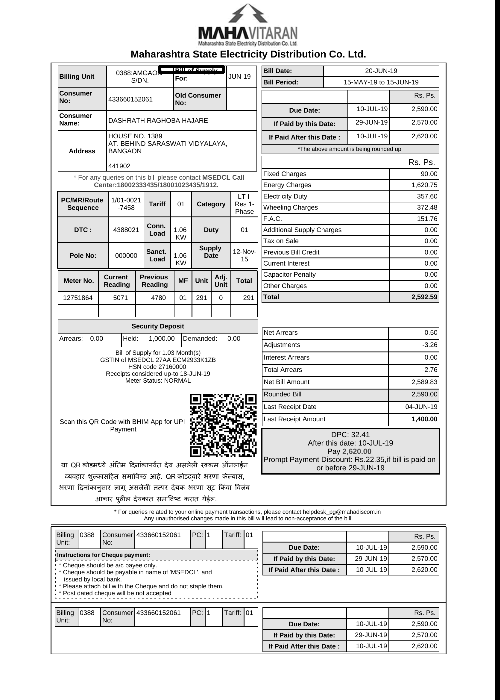

In [450]:
# Add rectangle to see the model predictions. 

x_min,x_max,y_min,y_max = preds[1].astype(int)
cv2_imshow(cv2.rectangle(images[1][:,:,0], (y_min,x_min), ( y_max,x_max), (0,255,0), 2))
